In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
col_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',
             'capital-gain','capital-loss','hours-per-week','native-country','income']

In [3]:
df = pd.read_csv('adult.csv',header=None,names=col_names,na_values='?')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Pre Processing

In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
cols = df.select_dtypes(include=['number']).columns

for col in cols:
    neg = (df[col] < 0).sum()
    print(f"negatives in '{col}': '{neg}'")

negatives in 'age': '0'
negatives in 'fnlwgt': '0'
negatives in 'education-num': '0'
negatives in 'capital-gain': '0'
negatives in 'capital-loss': '0'
negatives in 'hours-per-week': '0'


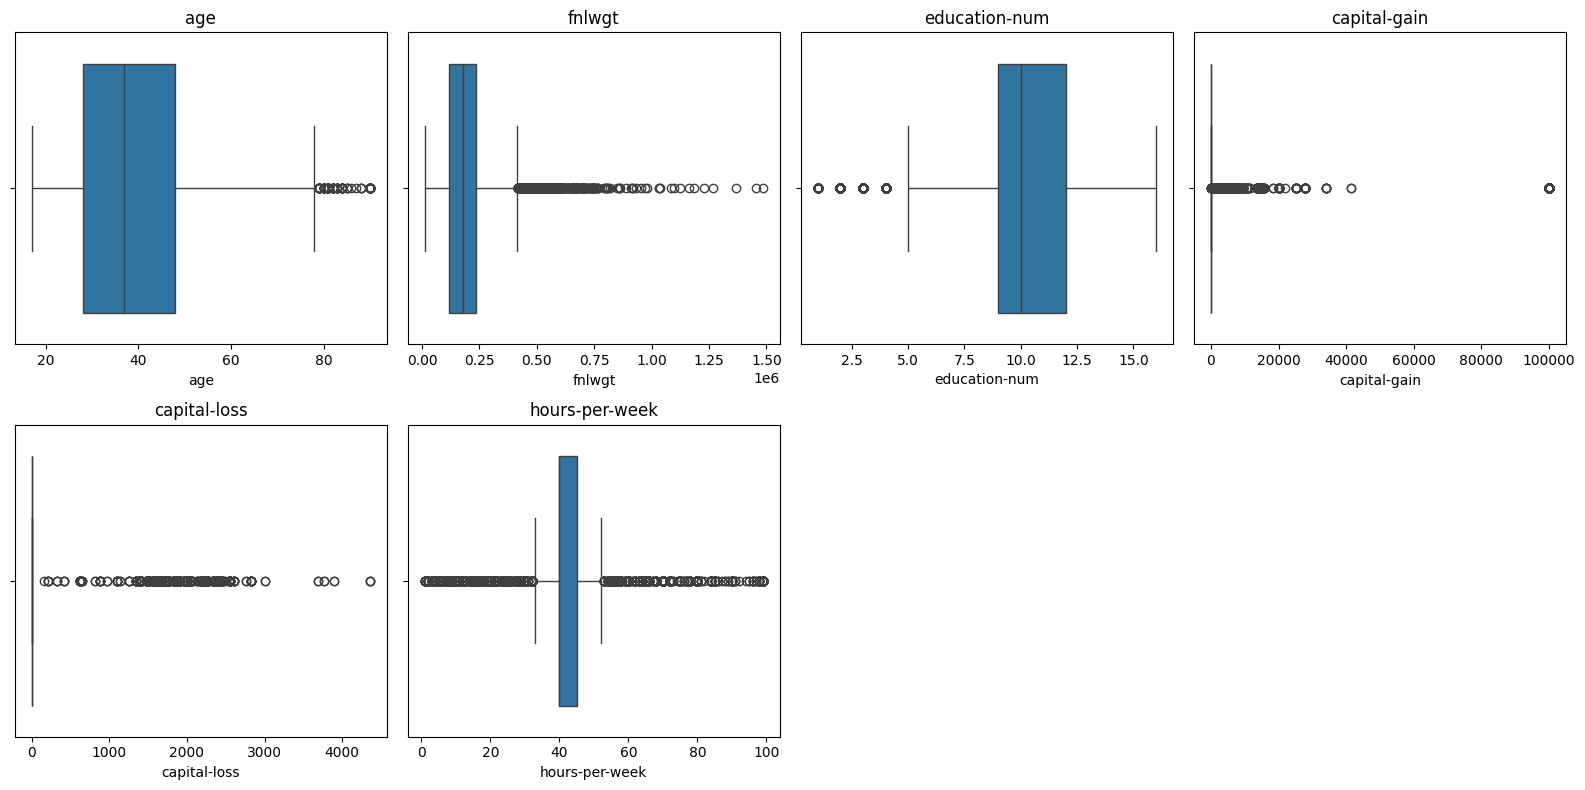

In [9]:
def visBoxplots(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    cols = len(numeric_cols)
    
    rows = (cols + 3) // 4
    cols = min(cols, 4)
    
    fig,axes = plt.subplots(rows, cols, figsize=(16,4*rows))
    
    if rows > 1:
        axes = axes.flatten()
        
    for i,col in enumerate(numeric_cols):
        sns.boxplot(x=df[col],ax=axes[i])
        axes[i].set_title(col)
        
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

visBoxplots(df)

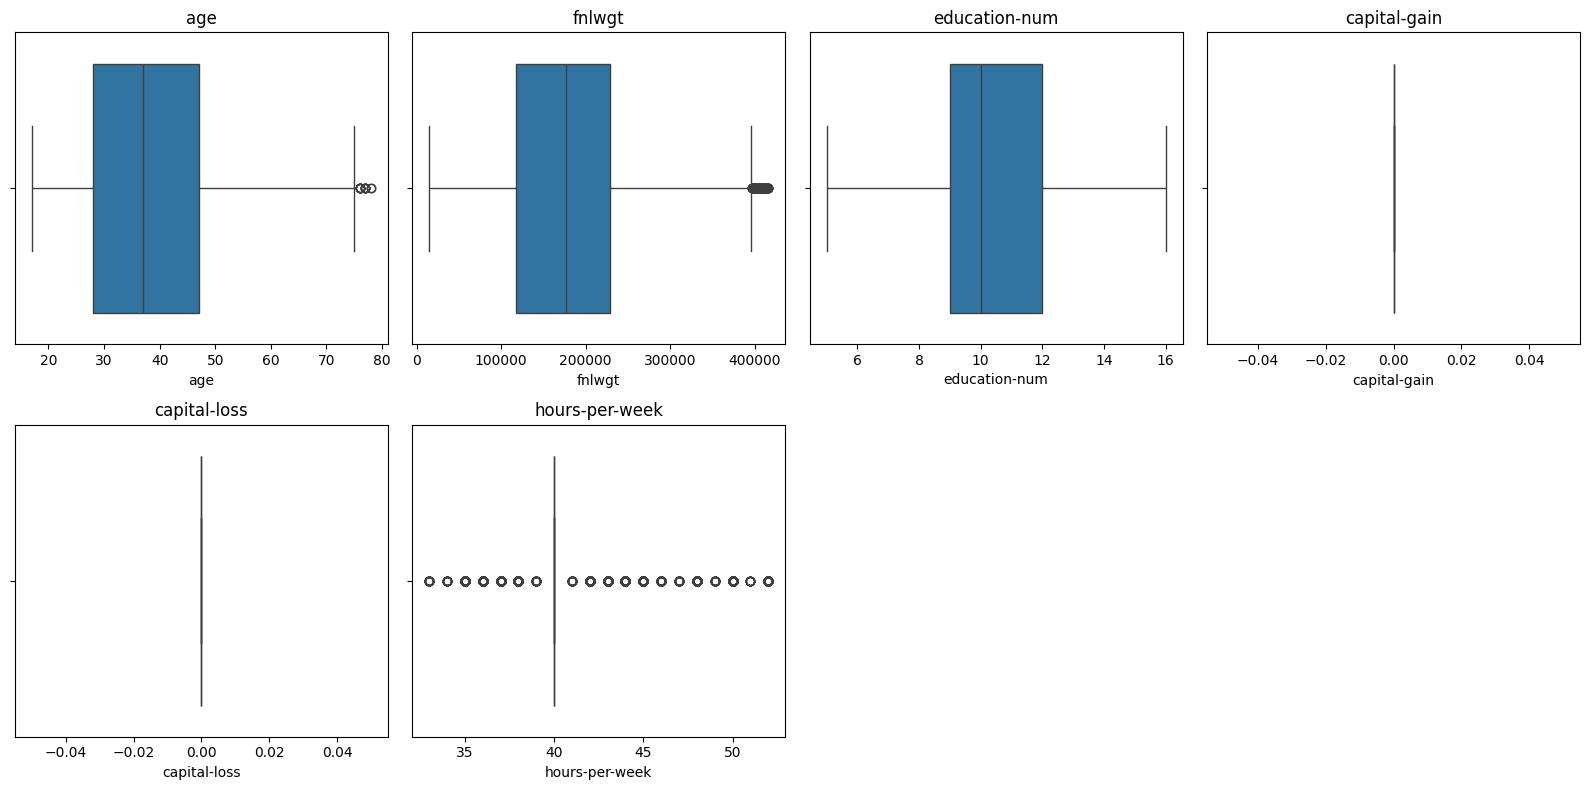

In [10]:
def rem1(df):
    numeric_cols = df.select_dtypes(include=['number'])
    zscore = np.abs((numeric_cols - numeric_cols.mean()) / (numeric_cols.std()))
    out = zscore > 3
    df = df[~out.any(axis=1)]
    return df;

def rem2(df):
    numeric_df = df.select_dtypes(include=['number'])

    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    filtered_df = numeric_df[~((numeric_df < lower_threshold) | (numeric_df > upper_threshold)).any(axis=1)]
    
    non_numeric = df.select_dtypes(exclude=['number'])
    
    combined_df = pd.concat([filtered_df, non_numeric], axis=1)
    return combined_df

ndf = rem2(df)
df = ndf
visBoxplots(df)

# Visualizations

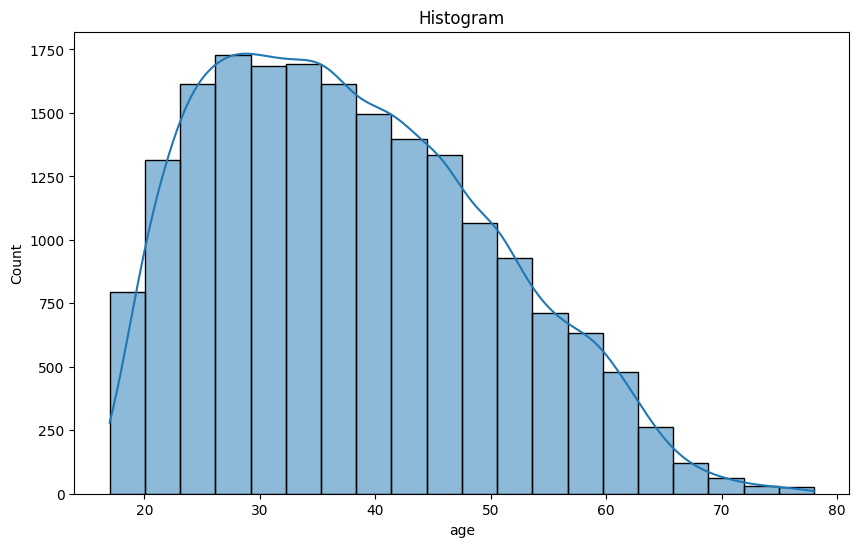

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],bins=20,kde=True)
plt.title('Histogram')
plt.xlabel("age")
plt.show()

/var/folders/_9/2x3x5v8n70x41tbv82trd0b80000gn/T/ipykernel_36742/1831229955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df['workclass'], y = df['age'], jitter=True,palette='viridis')


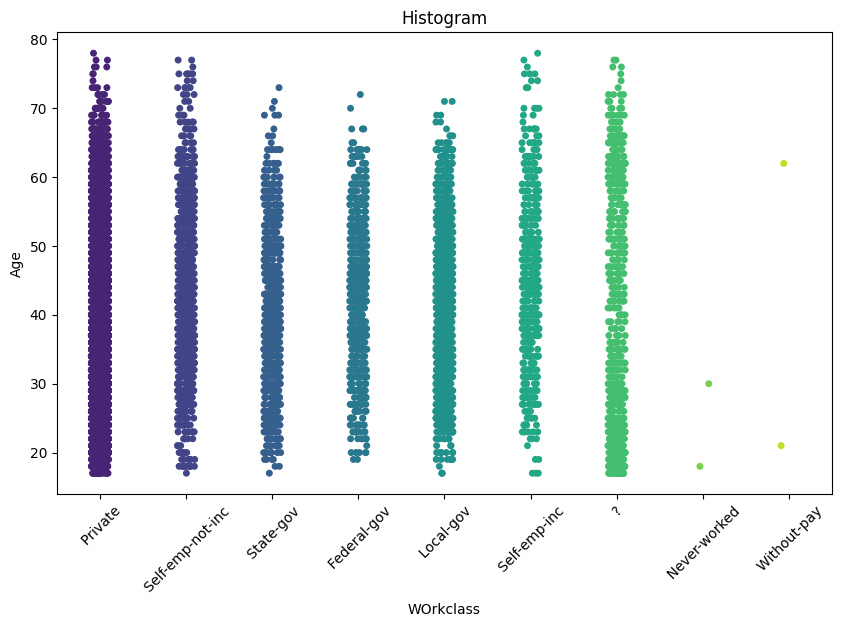

In [12]:
plt.figure(figsize=(10,6))
sns.stripplot(x=df['workclass'], y = df['age'], jitter=True,palette='viridis')
plt.title('Histogram')
plt.xlabel("WOrkclass")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()
# df.head()

In [13]:
df.loc[df['native-country'] == ' ?', 'native-country'] = df['native-country'].mode()[0]
country_vs_age = df[["native-country","income","age"]].groupby(["native-country","income"]).mean()
country_vs_age.reset_index()

,native-country,income,age
0,Cambodia,<=50K,40.000000
1,Cambodia,>50K,41.666667
2,Canada,<=50K,41.520833
3,Canada,>50K,48.333333
4,China,<=50K,40.484848
...,...,...,...
75,United-States,>50K,43.807703
76,Vietnam,<=50K,31.657895
77,Vietnam,>50K,30.000000
78,Yugoslavia,<=50K,33.714286


/var/folders/_9/2x3x5v8n70x41tbv82trd0b80000gn/T/ipykernel_36742/1746816998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y = 'native-country', data = country_vs_age,palette='viridis')


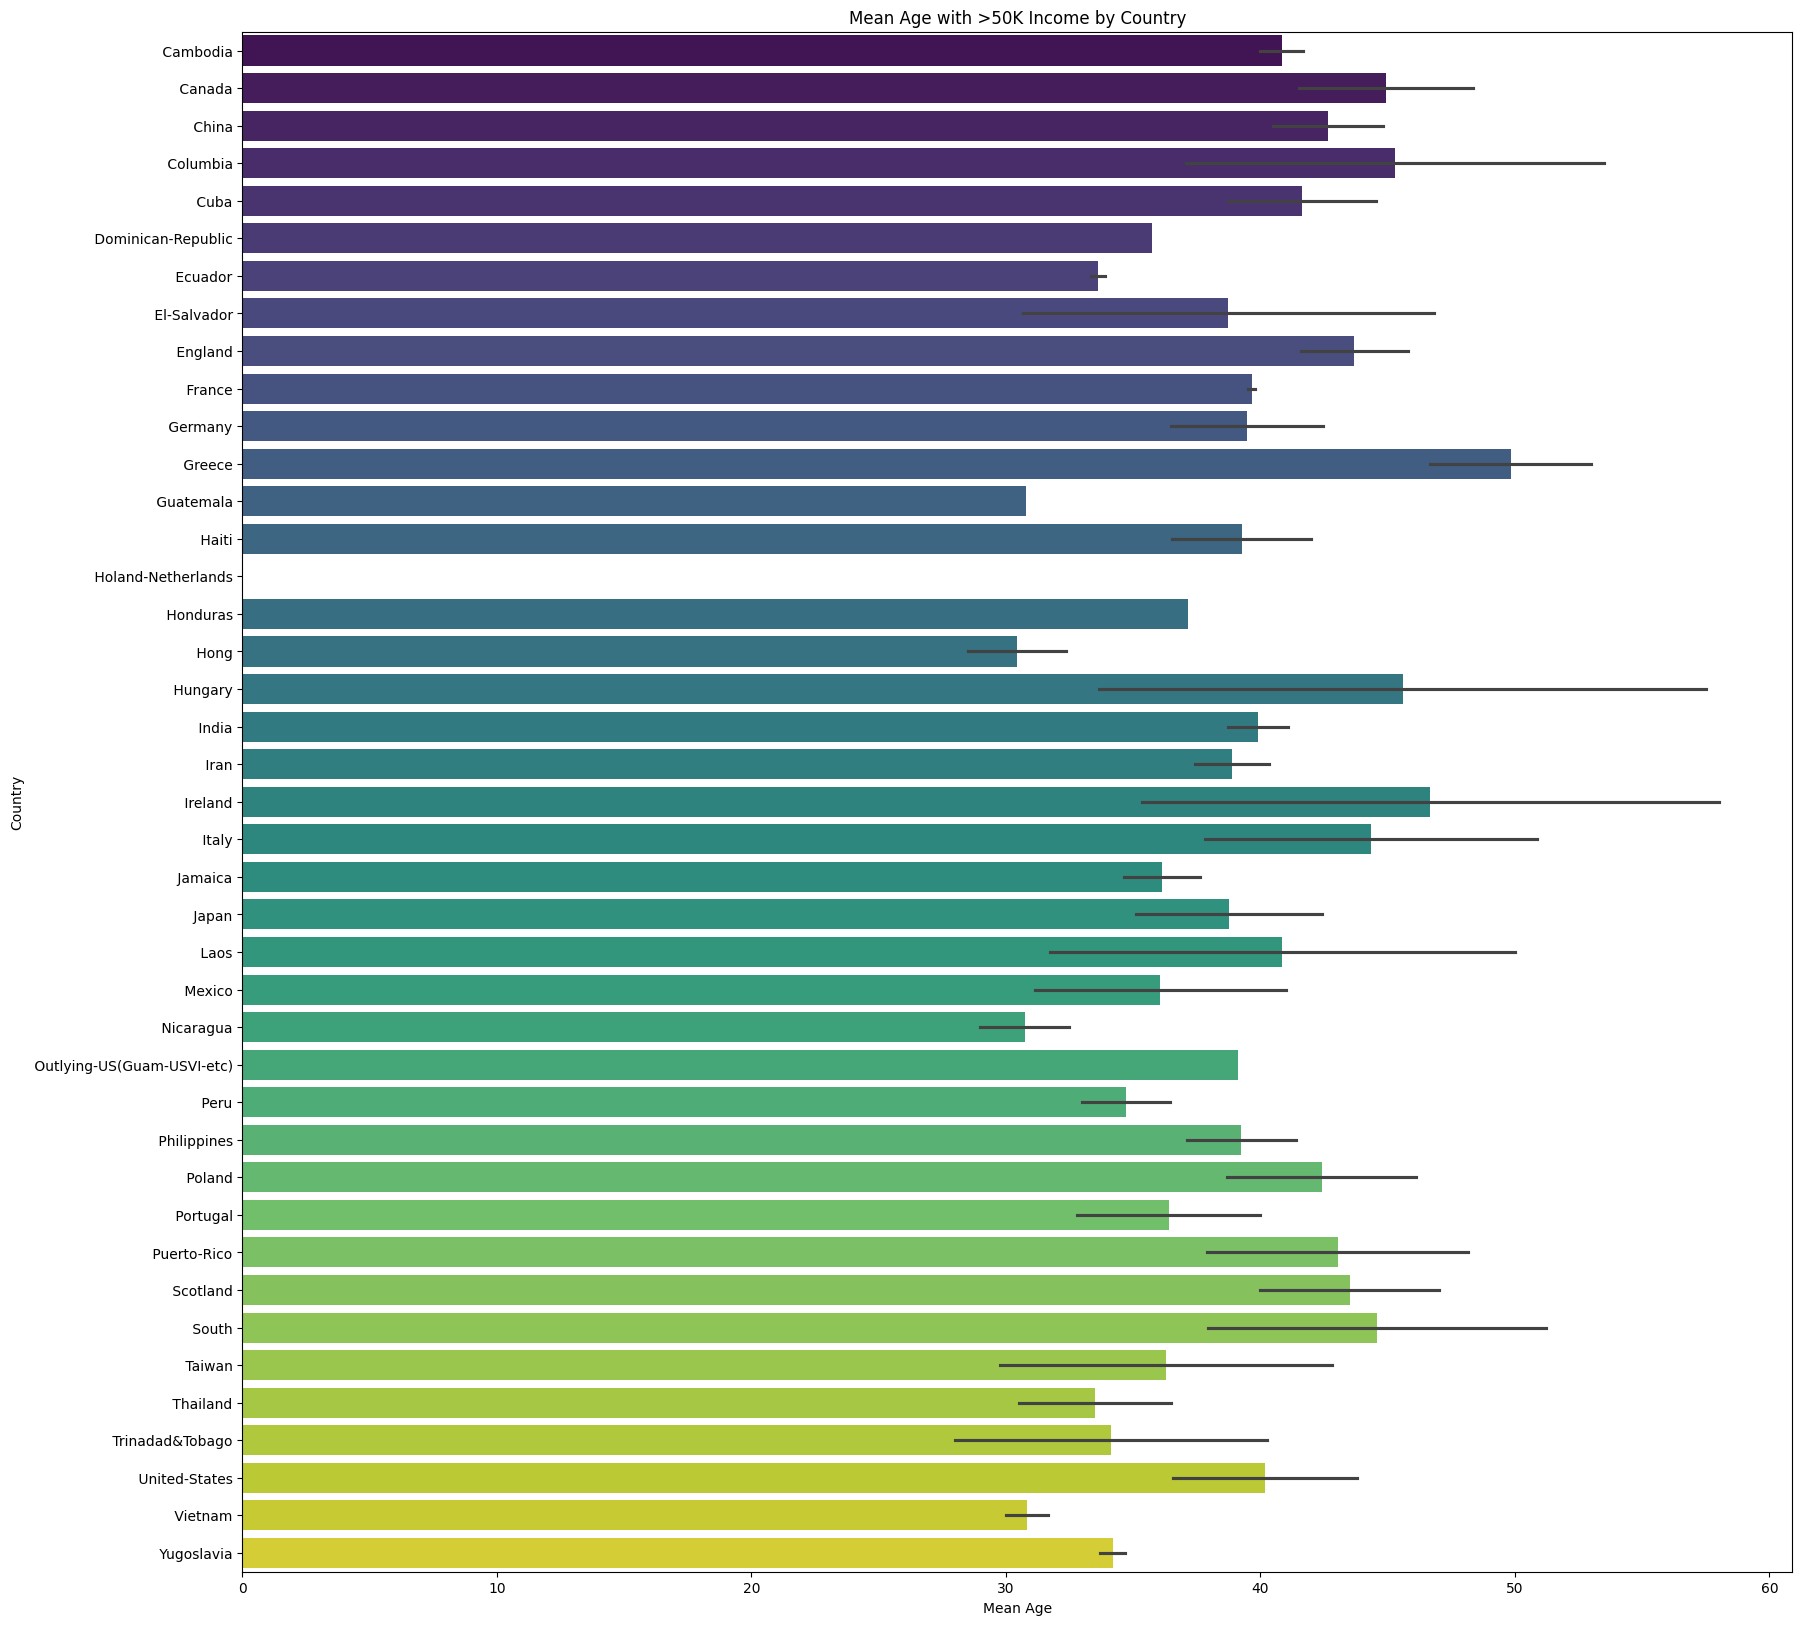

In [14]:
plt.figure(figsize=(20,20))
sns.barplot(x='age', y = 'native-country', data = country_vs_age,palette='viridis')
plt.xlabel("Mean Age")
plt.ylabel("Country")
plt.title("Mean Age with >50K Income by Country")
plt.show()

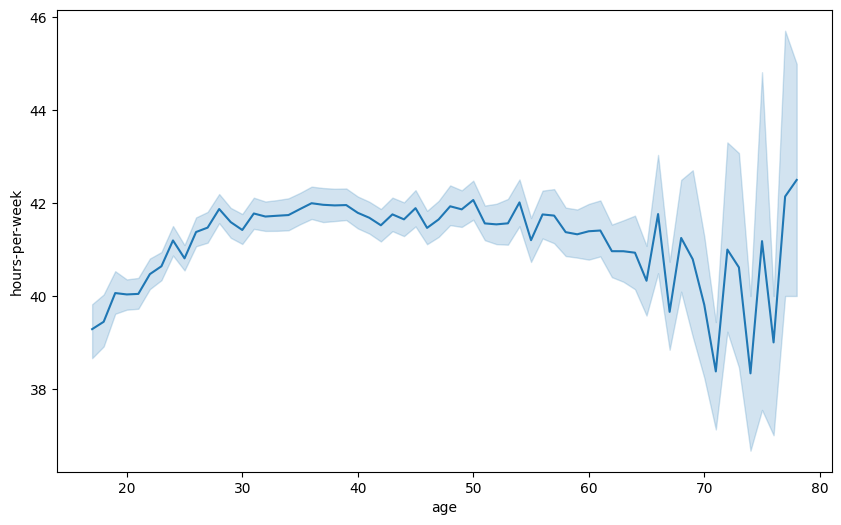

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['age'],y=df['hours-per-week'])
plt.show()

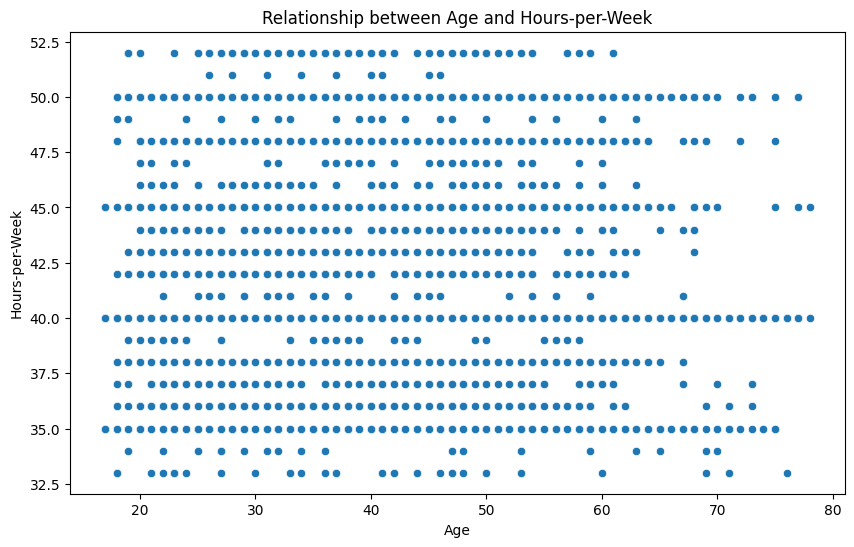

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='hours-per-week', data=df)
plt.title('Relationship between Age and Hours-per-Week')
plt.xlabel('Age')
plt.ylabel('Hours-per-Week')
plt.show()

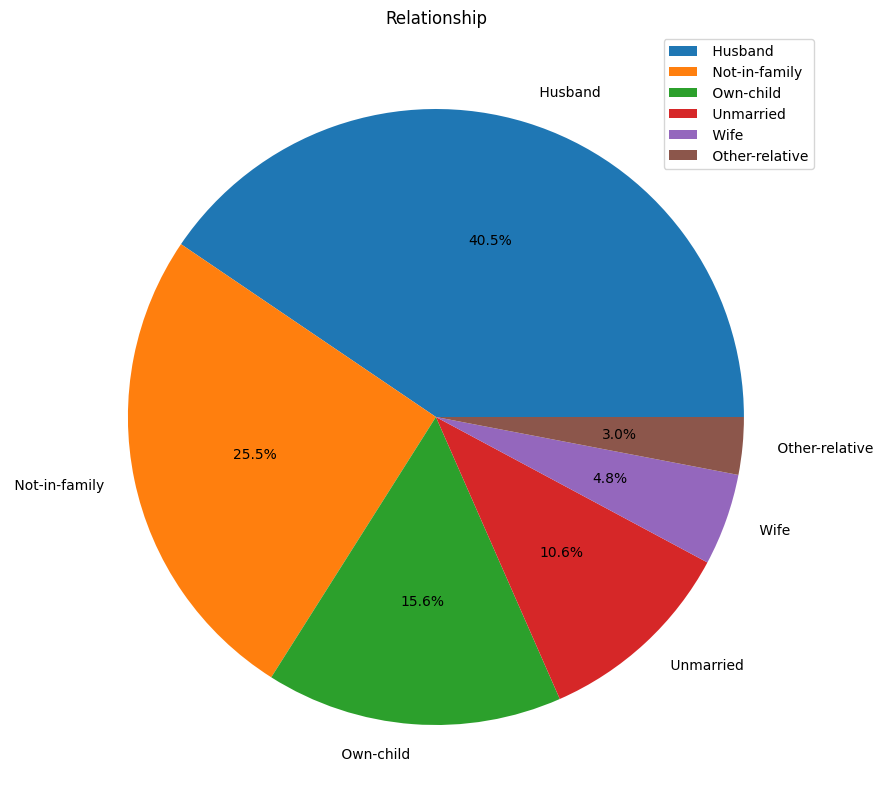

In [17]:
plt.figure(figsize=(10,10))
df['relationship'].value_counts().plot(kind='pie',autopct='%1.1f%%', legend=True)
plt.title('Relationship')
plt.ylabel('')
plt.show()

In [18]:
high_income_df = df[df['income'] == ' >50K']

males_high_income = high_income_df[high_income_df['sex'] == ' Male'].shape[0]
females_high_income = high_income_df[high_income_df['sex'] == ' Female'].shape[0]

low_income_df = df[df['income'] == ' <=50K']

males_low_income = low_income_df[low_income_df['sex'] == ' Male'].shape[0]
females_low_income = low_income_df[low_income_df['sex'] == ' Female'].shape[0]


In [19]:
males = [males_high_income, males_low_income]
females = [females_high_income, females_low_income]

labels = ['High Income', 'Low Income']
colors = ['lightblue', 'lightcoral']

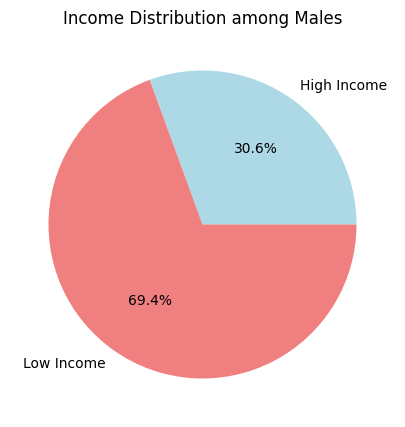

In [23]:
plt.figure(figsize=(10, 5))
plt.pie(males, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Income Distribution among Males')
plt.show()

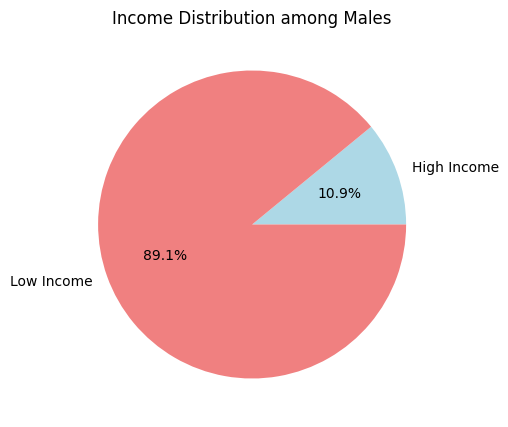

In [21]:
plt.figure(figsize=(10, 5))
plt.pie(females, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Income Distribution among Males')
plt.show()